<a href="https://colab.research.google.com/github/sagar-rathod/PytorchDeepML/blob/master/examples/Image_Classification_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install [deepml](https://github.com/sagar-rathod/PytorchDeepML) libarary.

In [ ]:
!pip install deepml

In [1]:
import torch
import torchvision
from torchvision import transforms

import numpy as np
from matplotlib import pyplot as plt

import matplotlib as mpl
import deepml
# Uncomment following line if your notebook theme is black
mpl.rcParams['text.color'] = "white"

In [2]:
deepml.__version__

'2.0.0-dev'

In [3]:
train_transforms = transforms.Compose([ transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
val_transforms = transforms.ToTensor()

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', download=True, transform=val_transforms)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = trainset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

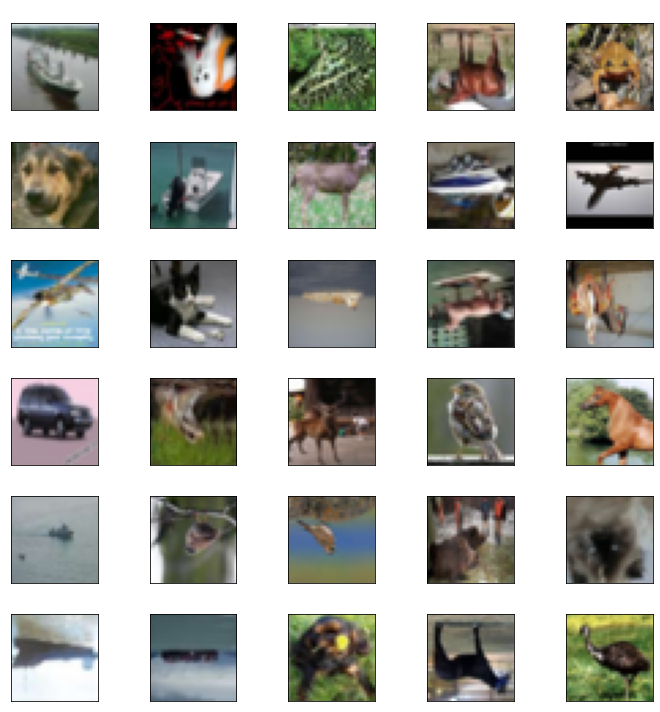

In [7]:
from deepml.visualize import show_images_from_dataset

show_images_from_dataset(trainset, samples=30, cols=5, figsize=(10, 10))

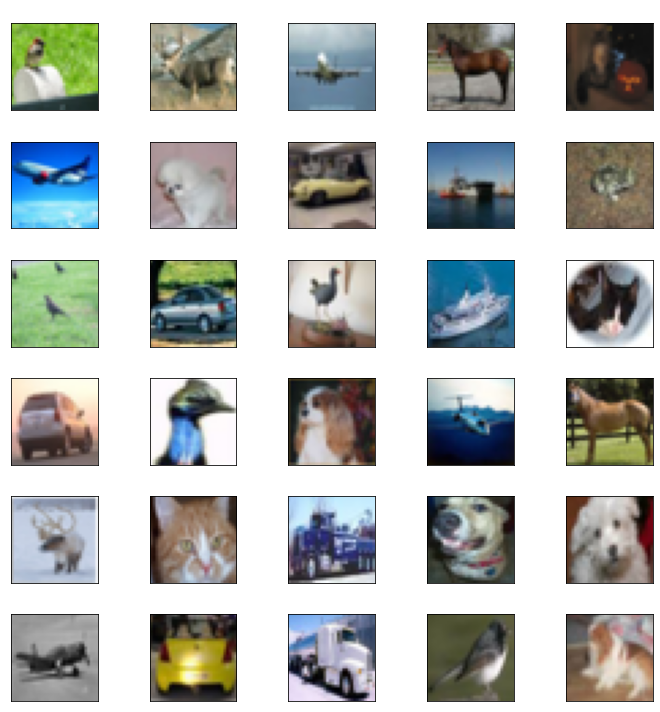

In [8]:
from deepml.visualize import show_images_from_loader
show_images_from_loader(testloader, samples=30, cols=5, classes=classes, figsize=(10, 10))

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [10]:
from deepml.tasks import ImageClassification
from deepml.train import Learner
from torch.nn import CrossEntropyLoss

In [11]:
image_classification = ImageClassification(model, model_dir='net', classes=classes)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()

learner = Learner(image_classification, optimizer, criterion)

In [12]:
# Enable Tensorboard on colab
%load_ext tensorboard

# Run tensorboard and provide model working directory
%tensorboard --logdir 'net'

Reusing TensorBoard on port 6006 (pid 9488), started 11 days, 18:46:15 ago. (Use '!kill 9488' to kill it.)

In [13]:
from deepml.metrics.classification import Accuracy, FScore, MCC

metrics = [('acc', Accuracy()), ('fscore', FScore()), ('mcc', MCC())]

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.5)

learner.fit(train_loader=trainloader, val_loader=testloader, epochs=2, metrics=metrics,
           lr_scheduler=lr_scheduler)

Epoch 1/2:


Saving best validation model.
Epoch 2/2:


Saving best validation model.


In [13]:
learner.fit(train_loader=trainloader, val_loader=testloader, epochs=10, metrics=metrics,
           lr_scheduler=lr_scheduler)

Epoch 3/12:


Saving best validation model.
Epoch 4/12:


Saving best validation model.
Epoch 5/12:


Saving best validation model.
Epoch 6/12:


Saving best validation model.
Epoch 7/12:


Saving best validation model.
Epoch 8/12:


Saving best validation model.
Epoch 9/12:


Saving best validation model.
Epoch 10/12:


Saving best validation model.
Epoch 11/12:


Saving best validation model.
Epoch 12/12:


Saving best validation model.


In [14]:
# Get model raw predictions
predictions, targets = learner.predict(testloader)

In [17]:
# Model's raw probabilities for diffferent classes for example in the test set.
predictions, predictions.shape

(tensor([[-0.9378, -0.7153,  0.3829,  ...,  0.4945, -2.4615, -1.4294],
         [-0.0520,  2.1711, -1.6778,  ..., -0.4118,  0.4432,  1.7200],
         [-0.3435, -0.5120, -0.7996,  ...,  0.0828, -0.9371,  0.8482],
         ...,
         [ 0.8509,  1.4471, -1.0431,  ..., -1.3297,  0.9530,  1.6261],
         [ 2.6185,  0.2469,  0.0996,  ..., -2.4420,  3.3273, -0.0524],
         [ 0.5735,  1.2590, -1.2257,  ..., -0.8474,  0.2932,  1.4909]]),
 torch.Size([50000, 10]))

In [14]:
predicted_class, probs, targets = learner.predict_class(testloader)

In [15]:
predicted_class, targets

(tensor([6, 1, 9,  ..., 1, 8, 9]), tensor([6, 9, 9,  ..., 9, 1, 1]))

In [16]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(targets, predicted_class))

Accuracy: 0.34314


In [17]:
print(classification_report(targets.tolist(), predicted_class.tolist(), target_names=classes))

              precision    recall  f1-score   support

    airplane       0.36      0.56      0.44      5000
  automobile       0.39      0.60      0.47      5000
        bird       0.27      0.20      0.23      5000
         cat       0.23      0.04      0.06      5000
        deer       0.33      0.31      0.32      5000
         dog       0.33      0.33      0.33      5000
        frog       0.36      0.49      0.41      5000
       horse       0.29      0.39      0.33      5000
        ship       0.41      0.33      0.37      5000
       truck       0.37      0.18      0.24      5000

    accuracy                           0.34     50000
   macro avg       0.33      0.34      0.32     50000
weighted avg       0.33      0.34      0.32     50000



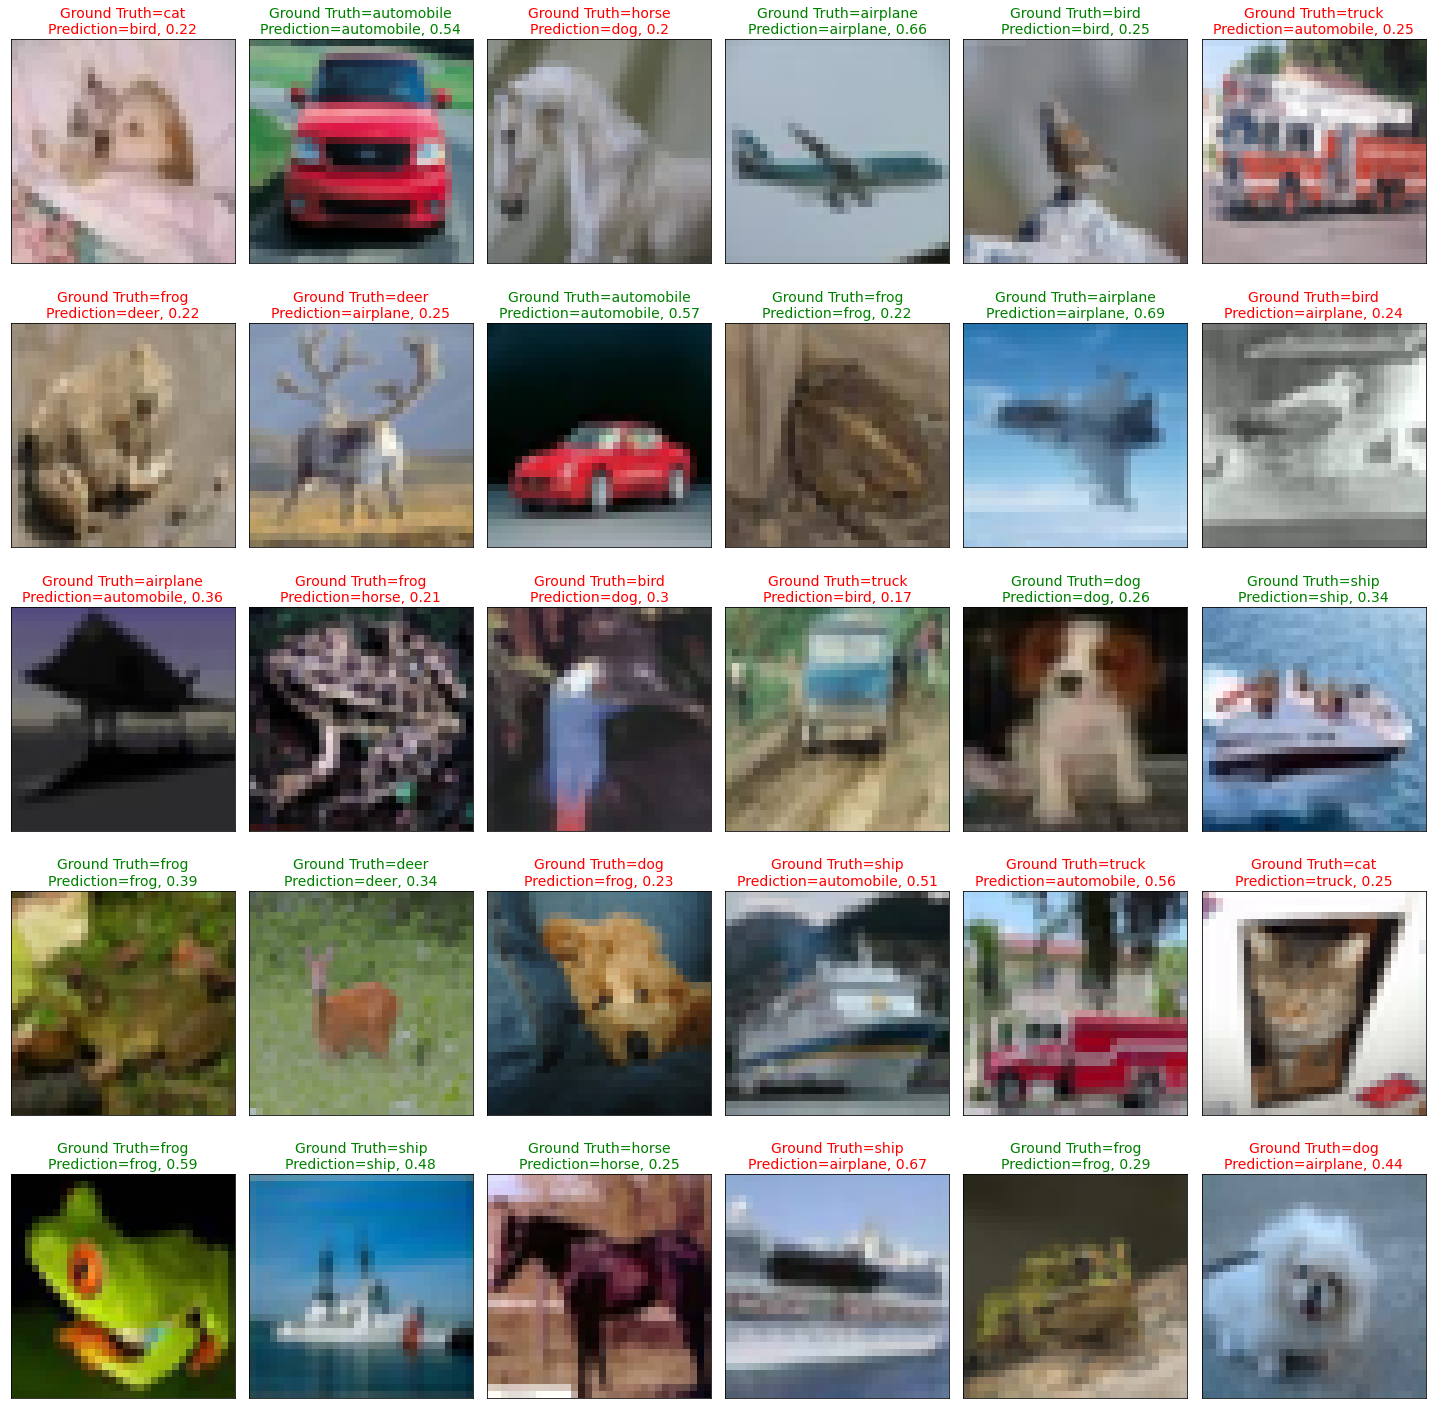

In [18]:
learner.show_predictions(testloader, samples=30, cols=6, figsize=(20, 20))